In [0]:
# Importing the libraries.
import pandas as pd
import numpy as np
import nltk

In [0]:
# Reading in the data.
df = pd.read_csv("JOB APPLICANTS.csv", encoding='latin-1') 
df.head()

,Candidate Id,Location,Current Annual Salary,Current Salary Currency,Current Salary Type,Expected Annual Salary,Expected Salary Currency,Total Experience in years,Current Industry,Current Fuction,Relocation Cities,Notice Period in days,Current Job Title,Data Source
0,A13380,NCR,NaN,NaN,ANNUAL,60.0,INR,9.00,"Banking,Financial Services,Broking",NaN,NaN,NaN,Team Manager Insurance,INDEED.COM
1,A9339,Vadodara,8.0,INR,ANNUAL,8.0,INR,3.00,Energy and Utilities | Telecommunications#Manu...,Business Development#Manufacturing#Project Man...,NaN,30.0,Marketing Executive,INTERNAL DATABASE
2,A10220,Noida,11.0,INR,ANNUAL,11.0,INR,0.70,IT | Computer Software#Manufacturing | Mechani...,IT Software,NaN,90.0,Software Developer,INTERNAL DATABASE
3,A8162,Hyderabad,8.0,INR,ANNUAL,8.0,INR,3.84,"IT | Information Services, IT | Computer Software","Business Development, IT Software",NaN,90.0,Senior systems engineer,LINKEDIN
4,A13729,Hyderabad,9.6,NaN,ANNUAL,11.0,INR,2.50,IT | Computer Software,IT Software#Research,NaN,30.0,Software Developer,LINKEDIN


## Data exploration

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7006 entries, 0 to 7005
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Candidate Id               7006 non-null   object 
 1   Location                   6924 non-null   object 
 2   Current Annual Salary      5319 non-null   float64
 3   Current Salary Currency    3601 non-null   object 
 4   Current Salary Type        7005 non-null   object 
 5   Expected Annual Salary     5891 non-null   float64
 6   Expected Salary Currency   6429 non-null   object 
 7   Total Experience in years  6480 non-null   float64
 8   Current Industry           7006 non-null   object 
 9   Current Fuction            5763 non-null   object 
 10  Relocation Cities          202 non-null    object 
 11  Notice Period in days      4154 non-null   float64
 12  Current Job Title          6564 non-null   object 
 13  Data Source                7006 non-null   objec

In [0]:
df.isnull().sum()

Candidate Id                    0
Location                       82
Current Annual Salary        1687
Current Salary Currency      3405
Current Salary Type             1
Expected Annual Salary       1115
Expected Salary Currency      577
Total Experience in years     526
Current Industry                0
Current Fuction              1243
Relocation Cities            6804
Notice Period in days        2852
Current Job Title             442
Data Source                     0
dtype: int64

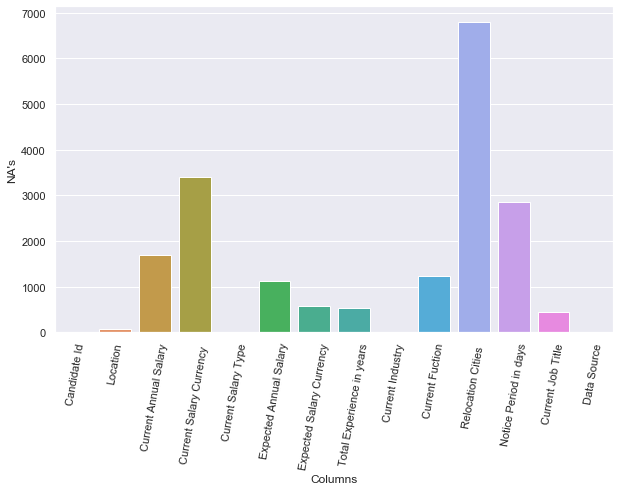

In [0]:
# Visualize missing values

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
x = df.columns
y = df.isnull().sum()
plt.figure(figsize=(10,6))
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
ax.set_xlabel("Columns")
ax.set_ylabel("NA's")
plt.xticks(rotation=80)

plt.show()

Relocation cities has the most missing values, followed by current annual salary.

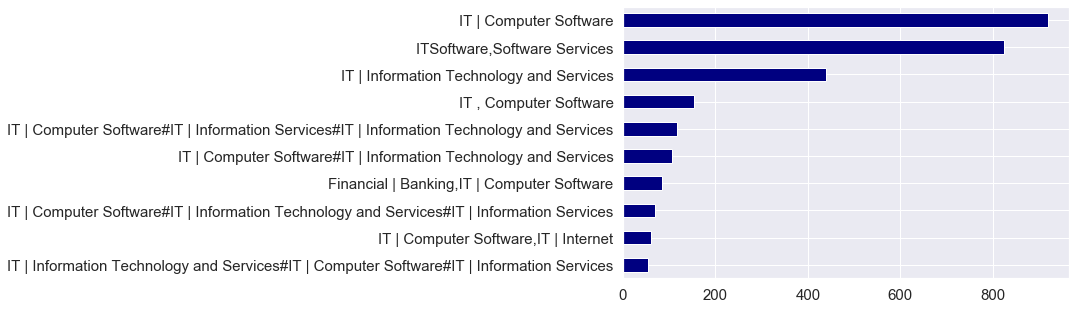

In [0]:
# Checking popular industries the job applicants are currently in.
df['Current Industry'].value_counts()[0:10].plot(kind='barh', figsize=[8,5],fontsize=15,color='navy').invert_yaxis()


- Most applicants are from the IT| Computer Software

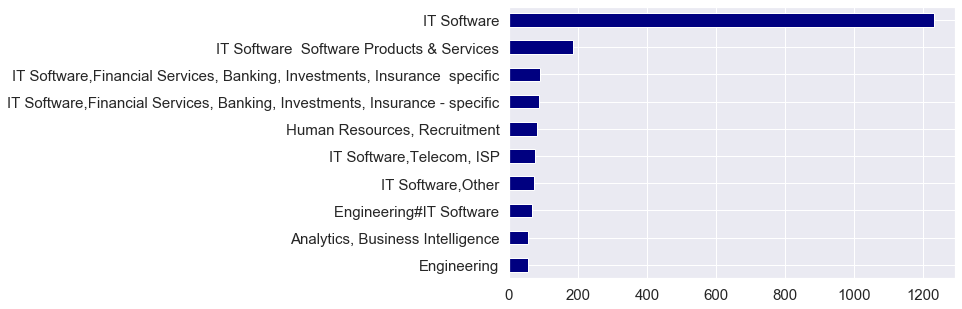

In [0]:
df['Current Fuction'].value_counts()[0:10].plot(kind='barh', figsize=[8,5],fontsize=15,color='navy').invert_yaxis()

- Most applicants were in the IT|Software department in the companies that they worked previously

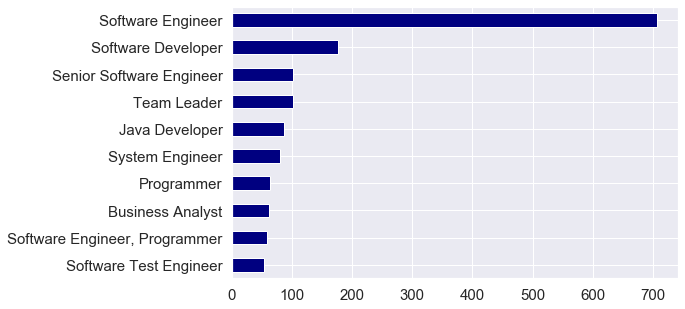

In [0]:
df['Current Job Title'].value_counts()[0:10].plot(kind='barh', figsize=[8,5],fontsize=15,color='navy').invert_yaxis()

- Most of the applicants have the title Software engineer

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

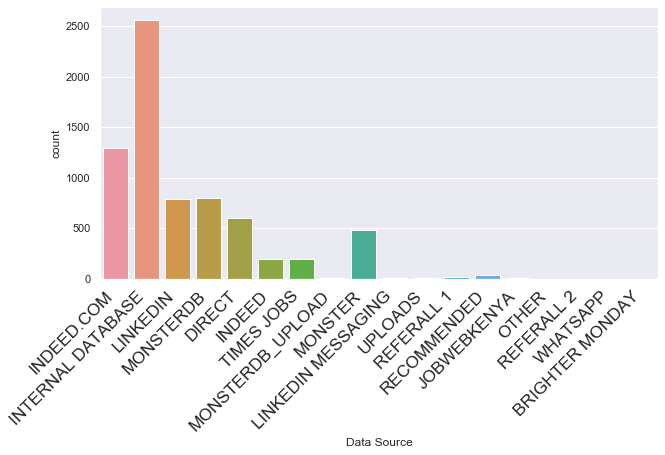

In [0]:
# Plot to see how the job data source
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df,
    x='Data Source'
)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

- The company received most job appications from indeed.com

In [0]:
# Selecting the necessary columns
cols = ['Candidate Id']+['Location']+['Current Industry']+['Current Fuction']+['Current Job Title']
df =df[cols]
df.head()

,Candidate Id,Location,Current Industry,Current Fuction,Current Job Title
0,A13380,NCR,"Banking,Financial Services,Broking",NaN,Team Manager Insurance
1,A9339,Vadodara,Energy and Utilities | Telecommunications#Manu...,Business Development#Manufacturing#Project Man...,Marketing Executive
2,A10220,Noida,IT | Computer Software#Manufacturing | Mechani...,IT Software,Software Developer
3,A8162,Hyderabad,"IT | Information Services, IT | Computer Software","Business Development, IT Software",Senior systems engineer
4,A13729,Hyderabad,IT | Computer Software,IT Software#Research,Software Developer


In [0]:
# Text corpus creation.

df= df.fillna(" ")

In [0]:
df["text"] = df["Location"].map(str) + " " + df["Current Industry"] +" "+ df["Current Fuction"]+ " "+df['Current Job Title']
df.head(2)

,Candidate Id,Location,Current Industry,Current Fuction,Current Job Title,text
0,A13380,NCR,"Banking,Financial Services,Broking",,Team Manager Insurance,"NCR Banking,Financial Services,Broking Team ..."
1,A9339,Vadodara,Energy and Utilities | Telecommunications#Manu...,Business Development#Manufacturing#Project Man...,Marketing Executive,Vadodara Energy and Utilities | Telecommunicat...


In [0]:
df_all = df[["Candidate Id", "text"]]
df_all.head()

,Candidate Id,text
0,A13380,"NCR Banking,Financial Services,Broking Team ..."
1,A9339,Vadodara Energy and Utilities | Telecommunicat...
2,A10220,Noida IT | Computer Software#Manufacturing | M...
3,A8162,"Hyderabad IT | Information Services, IT | Comp..."
4,A13729,Hyderabad IT | Computer Software IT Software#R...


In [0]:
fd = pd.read_csv("jobs all.csv", encoding="latin_1")
fd.head()

,Job Id,Job Title,Keywords,Minimum Experience in years,Maximum Experience in Years,Minimum Annual Salary,Maximum Annual Salary,Currency,Must Haves,Company Name,Founded Year,Employee Count,Job Location,Industry,Function,Required Education (UG),Required Education (PG),Notice Period (Days)
0,194,Full stack engineer,"java,Angular,Jquery,j2ee,microservices,micro s...",2,5,6,15,INR,NaN,Company X,2011,362,Hyderabad,IT | Computer Software,IT Software,B.Tech/B.E.,NaN,60
1,481,Senior Java Engineer/Tech Lead,"J2EE,Java,Hibernate,Webervices,REST Services,S...",7,10,10,15,INR,Should have proficient Java server side progra...,Company X,2011,362,Hyderabad,IT | Computer Software,IT Software,Other UG,Not Required,30
2,839,Front End Developer,NaN,2,5,4,8,INR,The candidate must have at least 2 years of so...,Company X,2011,362,Bengaluru/Bangalore,IT | Information Technology and Services,IT Software,Undergraduate (engineering),NaN,30
3,723,Application Developer,"c#, asp.net, sql, java, html5",3,8,4,9,INR,The Application Developer is a role within the...,Company X,2011,362,Bengaluru,IT | Information Technology and Services,IT Software,B.Tech/B.E.,NaN,30


In [0]:
cols = ['Job Id']+['Job Title']+['Keywords']+['Job Location']+['Industry']+["Function"]+["Required Education (PG)"]
fd =fd[cols]
fd.head()

,Job Id,Job Title,Keywords,Job Location,Industry,Function,Required Education (PG)
0,194,Full stack engineer,"java,Angular,Jquery,j2ee,microservices,micro s...",Hyderabad,IT | Computer Software,IT Software,NaN
1,481,Senior Java Engineer/Tech Lead,"J2EE,Java,Hibernate,Webervices,REST Services,S...",Hyderabad,IT | Computer Software,IT Software,Not Required
2,839,Front End Developer,NaN,Bengaluru/Bangalore,IT | Information Technology and Services,IT Software,NaN
3,723,Application Developer,"c#, asp.net, sql, java, html5",Bengaluru,IT | Information Technology and Services,IT Software,NaN


In [0]:
fd= fd.fillna(" ")

In [0]:
fd["text_job"] = fd['Job Title'].map(str) + " " + fd['Keywords']+ " "+fd['Job Location']+ " "+fd['Industry']+ " "+fd["Function"]+ " "+fd["Required Education (PG)"]
fd.head(2)

,Job Id,Job Title,Keywords,Job Location,Industry,Function,Required Education (PG),text_job
0,194,Full stack engineer,"java,Angular,Jquery,j2ee,microservices,micro s...",Hyderabad,IT | Computer Software,IT Software,,"Full stack engineer java,Angular,Jquery,j2ee,m..."
1,481,Senior Java Engineer/Tech Lead,"J2EE,Java,Hibernate,Webervices,REST Services,S...",Hyderabad,IT | Computer Software,IT Software,Not Required,"Senior Java Engineer/Tech Lead J2EE,Java,Hiber..."


In [0]:
fd_all = fd[["Job Id", "text_job"]]

In [0]:
fd_all

,Job Id,text_job
0,194,"Full stack engineer java,Angular,Jquery,j2ee,m..."
1,481,"Senior Java Engineer/Tech Lead J2EE,Java,Hiber..."
2,839,Front End Developer Bengaluru/Bangalore IT |...
3,723,"Application Developer c#, asp.net, sql, java, ..."


In [0]:
fd_all = fd_all.rename(columns={'Job Id': 'Candidate Id', 'text_job': 'text'})
df_final = pd.concat([df_all, fd_all])
df_final.reset_index(inplace=True, drop=True) 

In [0]:
df_final.tail()

,Candidate Id,text
7005,A11843,Bengaluru IT | Computer Software IT Software S...
7006,194,"Full stack engineer java,Angular,Jquery,j2ee,m..."
7007,481,"Senior Java Engineer/Tech Lead J2EE,Java,Hiber..."
7008,839,Front End Developer Bengaluru/Bangalore IT |...
7009,723,"Application Developer c#, asp.net, sql, java, ..."


In [0]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2   
  
def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text) 
    text = text.replace("nbsp", "")
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)

In [0]:
df_final['text'] = df_final['text'].apply(clean_txt) 

# Building recommender system

In [0]:
df_final["Candidate Id"] = df_final["Candidate Id"].astype("str") 

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
counts = count_vect.fit_transform(df_final["text"])

In [0]:
# Getting all the specific words from text corpus 
count_vect.get_feature_names()

['abs',
 'academic',
 'academy',
 'accel',
 'access',
 'accessories',
 'accordance',
 'account',
 'accountant',
 'achalpur',
 'acquisition',
 'acquistion',
 'act',
 'activity',
 'adalaj',
 'add',
 'adilabad',
 'adityapur',
 'admin',
 'administration',
 'administrative',
 'administrator',
 'adra',
 'ads',
 'advance',
 'advertise',
 'adviser',
 'advisor',
 'advisory',
 'advocacy',
 'aem',
 'aerospace',
 'affairs',
 'affordable',
 'aftermarket',
 'agartala',
 'agent',
 'agile',
 'agm',
 'agra',
 'agreement',
 'agriculture',
 'ahmadnagar',
 'ahmedabad',
 'air',
 'airline',
 'airlines',
 'airport',
 'alappuzha',
 'allahabad',
 'alliances',
 'alternative',
 'aluminium',
 'alwar',
 'amalner',
 'ambassador',
 'ambikapur',
 'amc',
 'america',
 'amritsar',
 'analsyt',
 'analyist',
 'analyse',
 'analysis',
 'analyst',
 'analysts',
 'analytics',
 'anand',
 'ananlsyt',
 'ananlyst',
 'anantapur',
 'ancillary',
 'android',
 'andtechnology',
 'angular',
 'angularjs',
 'animation',
 'animator',
 'anjad

In [0]:
# Length of the specific names
len(count_vect.get_feature_names())

1000

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(counts, counts)
print(cosine_sim)

[[1.         0.         0.         ... 0.07905694 0.11785113 0.10206207]
 [0.         1.         0.14433757 ... 0.         0.         0.        ]
 [0.         0.14433757 1.         ... 0.4472136  0.33333333 0.28867513]
 ...
 [0.07905694 0.         0.4472136  ... 1.         0.2236068  0.32274861]
 [0.11785113 0.         0.33333333 ... 0.2236068  1.         0.57735027]
 [0.10206207 0.         0.28867513 ... 0.32274861 0.57735027 1.        ]]


In [0]:
cosine_sim.shape

(7010, 7010)

In [0]:
indices = pd.Series(df_final['Candidate Id'])
indices

0       A13380
1        A9339
2       A10220
3        A8162
4       A13729
         ...  
7005    A11843
7006       194
7007       481
7008       839
7009       723
Name: Candidate Id, Length: 7010, dtype: object

In [0]:
# idx = indices[indices == '194'].index[0]
# cosine_sim[idx]
# scores = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
# indices = scores.iloc[1:].index
# indices = list(indices)



In [0]:
# this function takes in a job index as input and returns the candidates in order of cosine similarity.

def recommend(candidate_id, cosine_sim = cosine_sim):
    recommended_candidates = []
    idx = indices[indices == candidate_id].index[0]   # to get the index of the job title matching the candidate
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)   # similarity scores in descending order
    top_indices = list(score_series.iloc[1:].index)   # to get the indices of  most similar candidates
    # [1:] to exclude 0 (index 0 is the input job)
    
    for i in top_indices:   # to append the candidates whos profil matches the job.
        recommended_candidates.append(df_final['Candidate Id'][i])
        
    return recommended_candidates




# JOB 1 SCORES

In [0]:
candidates = recommend("194")
candidates  

['A12828',
 'A13064',
 'A14020',
 'A13824',
 'A7606',
 'A13719',
 'A7511',
 'A13272',
 'A13067',
 'A13249',
 'A13295',
 'A13624',
 'A13061',
 'A13102',
 'A12811',
 'A12792',
 'A12676',
 'A13057',
 'A13059',
 'A12244',
 'A13215',
 'A12812',
 'A11146',
 'A13058',
 'A12778',
 'A11729',
 'A13599',
 'A13129',
 'A13069',
 'A9737',
 'A8094',
 'A13121',
 'A13723',
 'A13082',
 'A13907',
 'A12578',
 'A13051',
 'A8794',
 'A9726',
 'A13166',
 'A12675',
 'A13635',
 'A8699',
 'A10867',
 'A12711',
 'A11851',
 'A12672',
 'A9725',
 'A13597',
 'A12353',
 'A13079',
 'A11455',
 'A12010',
 'A13611',
 'A11828',
 'A11841',
 'A8040',
 'A13099',
 'A13296',
 'A8961',
 'A13098',
 'A7621',
 'A13062',
 'A10941',
 'A13097',
 'A13594',
 'A12822',
 'A13616',
 'A9729',
 'A9728',
 'A13299',
 'A13869',
 'A12494',
 'A9743',
 'A13590',
 'A8845',
 'A10859',
 'A13072',
 'A13912',
 'A14138',
 'A13068',
 'A14076',
 'A12716',
 'A8710',
 'A13667',
 'A9744',
 'A11480',
 'A12183',
 'A12815',
 'A11641',
 'A13042',
 'A13047',
 'A12

In [0]:
idx = indices[indices == '194'].index[0]
cosine_sim[idx]
scores_job1 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

In [0]:
scores_job1 = list(scores_job1[1:])
scores_job1

[0.5832118435198044,
 0.5832118435198044,
 0.5821817364274595,
 0.5773502691896257,
 0.5773502691896257,
 0.5773502691896257,
 0.5773502691896257,
 0.5773502691896257,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095138409,
 0.5669467095

In [0]:
df_job1 = pd.DataFrame(list(zip(candidates, scores_job1)), 
               columns =['candidate', 'scores_job1']) 
# Score for job 1
df_job1.head(20)


,candidate,scores_job1
0,A12828,0.583212
1,A13064,0.583212
2,A14020,0.582182
3,A13824,0.577350
4,A7606,0.577350
5,A13719,0.577350
6,A7511,0.577350
7,A13272,0.577350
8,A13067,0.566947
9,A13249,0.566947


#  JOB 2 SCORES

In [0]:
candidates = recommend("481")
candidates  

['A14020',
 'A12711',
 'A12296',
 'A12708',
 'A13089',
 'A11716',
 'A8284',
 'A13746',
 'A13896',
 'A11110',
 'A14074',
 'A12781',
 'A11632',
 'A8120',
 'A13699',
 'A13731',
 'A13064',
 'A10942',
 'A12737',
 'A12325',
 'A12828',
 'A13676',
 'A12169',
 'A13987',
 'A11796',
 'A12591',
 'A13839',
 'A12271',
 'A12618',
 'A12873',
 'A12278',
 'A12808',
 'A7583',
 'A7528',
 'A12721',
 'A10692',
 'A13273',
 'A12252',
 'A12774',
 'A11515',
 'A13719',
 'A7515',
 'A7606',
 'A13824',
 'A7511',
 'A13272',
 'A11839',
 'A8349',
 'A8395',
 'A13062',
 'A8699',
 'A13295',
 'A11455',
 'A8040',
 'A8845',
 'A12578',
 'A13068',
 'A12811',
 'A13042',
 'A10941',
 'A9726',
 'A13097',
 'A13129',
 'A11641',
 'A12778',
 'A13590',
 'A13100',
 'A13594',
 'A9743',
 'A13047',
 'A11003',
 'A13059',
 'A13103',
 'A13635',
 'A12244',
 'A13667',
 'A12353',
 'A13067',
 'A12716',
 'A13072',
 'A13299',
 'A12494',
 'A12694',
 'A13098',
 'A13624',
 'A9728',
 'A12672',
 'A13155',
 'A13121',
 'A13912',
 'A13057',
 'A13869',
 'A

In [0]:
idx = indices[indices == '481'].index[0]
cosine_sim[idx]
scores_job2 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

In [0]:
scores_job2 = list(scores_job2[1:])
scores_job2

[0.6507913734559685,
 0.6454972243679029,
 0.6350852961085883,
 0.6324555320336758,
 0.6324555320336758,
 0.6324555320336758,
 0.6324555320336758,
 0.6201736729460423,
 0.6201736729460423,
 0.6201736729460423,
 0.6149186938124422,
 0.6149186938124422,
 0.6067798762169179,
 0.6067798762169179,
 0.6,
 0.6,
 0.5976143046671969,
 0.5976143046671969,
 0.5976143046671969,
 0.5976143046671969,
 0.5976143046671968,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.5962847939999438,
 0.59336610396393,
 0.5916079783099616,
 0.5916079783099616,
 0.5916079783099616,
 0.5916079783099616,
 0.5916079783099616,
 0.5916079783099616,
 0.5855400437691199,
 0.5813776741499453,
 0.5813776741499453,
 0.

In [0]:
df_job2 = pd.DataFrame(list(zip(candidates, scores_job2)), 
               columns =['candidate', 'scores_job2']) 
# Score for job 1
df_job2.head(20)


,candidate,scores_job2
0,A14020,0.650791
1,A12711,0.645497
2,A12296,0.635085
3,A12708,0.632456
4,A13089,0.632456
5,A11716,0.632456
6,A8284,0.632456
7,A13746,0.620174
8,A13896,0.620174
9,A11110,0.620174


#  JOB 3 SCORES

In [0]:
candidates = recommend("839")
candidates  

['A13926',
 'A14253',
 'A14278',
 'A13938',
 'A14254',
 'A14362',
 'A14212',
 'A14043',
 'A8740',
 'A11218',
 'A14364',
 'A14239',
 'A14262',
 'A10245',
 'A13988',
 'A14348',
 'A11471',
 'A7743',
 'A8682',
 'A11250',
 'A13928',
 'A14252',
 'A12478',
 'A12438',
 'A14375',
 'A12261',
 'A14290',
 'A11642',
 'A12537',
 'A14273',
 'A14050',
 'A8913',
 'A14298',
 'A11497',
 'A14374',
 'A12931',
 'A14204',
 'A14380',
 'A11133',
 'A12525',
 'A11236',
 'A13715',
 'A14166',
 'A12538',
 'A12446',
 'A13761',
 'A12829',
 'A8802',
 'A12227',
 'A13937',
 'A8824',
 'A8199',
 'A13705',
 'A13730',
 'A11515',
 'A10828',
 'A8088',
 'A12162',
 'A12433',
 'A12208',
 'A14195',
 'A8677',
 'A14384',
 'A12486',
 'A11813',
 'A12181',
 'A8594',
 'A8687',
 'A12497',
 'A14137',
 'A10989',
 'A12437',
 'A14106',
 'A11244',
 'A12153',
 'A12129',
 'A14223',
 'A11043',
 'A14118',
 'A13958',
 'A14387',
 'A11528',
 'A12386',
 'A12050',
 'A11224',
 'A12975',
 'A14238',
 'A11545',
 'A14346',
 'A13961',
 'A14359',
 'A12535',

In [0]:
idx = indices[indices == '839'].index[0]
cosine_sim[idx]
scores_job3 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

In [0]:
scores_job3 = list(scores_job3[1:])
scores_job3

[0.9428090415820634,
 0.9428090415820634,
 0.9428090415820634,
 0.8819171036881966,
 0.8642416214502248,
 0.8642416214502248,
 0.8249579113843054,
 0.8249579113843054,
 0.7856742013183861,
 0.7777777777777777,
 0.7698003589195012,
 0.7647191129018724,
 0.7559289460184543,
 0.7559289460184543,
 0.7559289460184543,
 0.75,
 0.7453559924999298,
 0.7378647873726218,
 0.7378647873726218,
 0.7276068751089988,
 0.7276068751089988,
 0.7276068751089988,
 0.7276068751089988,
 0.7273929674533078,
 0.7106690545187014,
 0.7106690545187014,
 0.7106690545187013,
 0.7071067811865476,
 0.7071067811865476,
 0.7071067811865475,
 0.7071067811865475,
 0.7071067811865475,
 0.7035264706814485,
 0.7035264706814485,
 0.6885303726590963,
 0.6885303726590963,
 0.6882472016116852,
 0.6804138174397717,
 0.6804138174397717,
 0.6804138174397717,
 0.6804138174397717,
 0.6804138174397717,
 0.6804138174397717,
 0.6804138174397717,
 0.6804138174397717,
 0.6804138174397717,
 0.6804138174397717,
 0.6804138174397717,
 0.680

In [0]:
df_job3 = pd.DataFrame(list(zip(candidates, scores_job3)), 
               columns =['candidate', 'scores_job3']) 
# Score for job 1
df_job3.head(20)


,candidate,scores_job3
0,A13926,0.942809
1,A14253,0.942809
2,A14278,0.942809
3,A13938,0.881917
4,A14254,0.864242
5,A14362,0.864242
6,A14212,0.824958
7,A14043,0.824958
8,A8740,0.785674
9,A11218,0.777778


#  JOB 4 SCORES

In [0]:
candidates = recommend("723")
candidates  

['A12227',
 'A11236',
 'A13715',
 'A11250',
 'A12478',
 'A12537',
 'A11642',
 'A12162',
 'A13988',
 'A12480',
 'A10245',
 'A11514',
 'A11471',
 'A13046',
 'A10878',
 'A12341',
 'A11506',
 'A12948',
 'A14253',
 'A12760',
 'A11273',
 'A12150',
 'A14337',
 'A14374',
 'A12091',
 'A14326',
 'A11701',
 'A8824',
 'A11706',
 'A13724',
 'A8802',
 'A11526',
 'A12446',
 'A12287',
 'A12371',
 'A12068',
 'A10955',
 'A12525',
 'A11790',
 'A11495',
 'A12625',
 'A12232',
 'A11124',
 'A12829',
 'A12402',
 'A14380',
 'A11504',
 'A8199',
 'A12241',
 'A13269',
 'A11077',
 'A14166',
 'A11140',
 'A12132',
 'A11660',
 'A11759',
 'A11558',
 'A13696',
 'A12115',
 'A11815',
 'A12100',
 'A11059',
 'A13705',
 'A13761',
 'A12473',
 'A10915',
 'A12538',
 'A13937',
 'A11563',
 'A12898',
 'A11155',
 'A12052',
 'A11724',
 'A13730',
 'A11120',
 'A11553',
 'A11515',
 'A11249',
 'A8088',
 'A11586',
 'A12711',
 'A11643',
 'A11234',
 'A13767',
 'A11528',
 'A12437',
 '839',
 'A11043',
 'A14387',
 'A14118',
 'A11244',
 'A143

In [0]:
idx = indices[indices == '723'].index[0]
cosine_sim[idx]
scores_job4 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

In [0]:
scores_job4 = list(scores_job4[1:])
scores_job4

[0.7071067811865477,
 0.7071067811865477,
 0.7071067811865477,
 0.7001400420140049,
 0.7001400420140049,
 0.6804138174397718,
 0.6804138174397718,
 0.6666666666666669,
 0.6546536707079772,
 0.6546536707079772,
 0.6546536707079772,
 0.6546536707079772,
 0.6454972243679029,
 0.6301260378126045,
 0.6301260378126045,
 0.6301260378126045,
 0.6154574548966637,
 0.6123724356957947,
 0.6123724356957946,
 0.6123724356957946,
 0.6092717958449425,
 0.6092717958449425,
 0.6019292654288462,
 0.5962847939999439,
 0.5960395606792698,
 0.5960395606792698,
 0.5896618941607872,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509887897,
 0.5892556509

In [0]:
df_job4 = pd.DataFrame(list(zip(candidates, scores_job4)), 
               columns =['candidate', 'scores_job4']) 
# Score for job 1
df_job4.head(20)


,candidate,scores_job4
0,A12227,0.707107
1,A11236,0.707107
2,A13715,0.707107
3,A11250,0.700140
4,A12478,0.700140
5,A12537,0.680414
6,A11642,0.680414
7,A12162,0.666667
8,A13988,0.654654
9,A12480,0.654654


#  JOINING THE 4 DATA FRAMES ON THE CANDIDATES COLUMN

In [0]:
# jobs 1 and 2 merge
df_jobs12 = df_job1.merge(df_job2, left_on='candidate', right_on='candidate', how='outer')

# jobs 1,2 and 3 merge
df_jobs123 = df_jobs12.merge(df_job3, left_on='candidate', right_on='candidate', how='outer')

# jobs 1,2,3 and 4 merge.
df_jobs1234 = df_jobs123.merge(df_job4, left_on='candidate', right_on='candidate', how='outer') 
df_jobs1234.head(20)                             


,candidate,scores_job1,scores_job2,scores_job3,scores_job4
0,A12828,0.583212,0.597614,0.445435,0.462910
1,A13064,0.583212,0.597614,0.445435,0.385758
2,A14020,0.582182,0.650791,0.242536,0.280056
3,A13824,0.577350,0.591608,0.251976,0.218218
4,A7606,0.577350,0.591608,0.251976,0.218218
5,A13719,0.577350,0.591608,0.251976,0.218218
6,A7511,0.577350,0.591608,0.251976,0.218218
7,A13272,0.577350,0.591608,0.251976,0.218218
8,A13067,0.566947,0.580948,0.288675,0.250000
9,A13249,0.566947,0.580948,0.288675,0.250000


In [0]:
df_jobs1234[df_jobs1234['candidate']=="194"]

,candidate,scores_job1,scores_job2,scores_job3,scores_job4
7009,194,NaN,0.536745,0.218218,0.251976


In [0]:
df_jobs1234[df_jobs1234['candidate']=="481"]

,candidate,scores_job1,scores_job2,scores_job3,scores_job4
184,481,0.536745,NaN,0.223607,0.322749


In [0]:
df_jobs1234[df_jobs1234['candidate']=="839"]

,candidate,scores_job1,scores_job2,scores_job3,scores_job4
3874,839,0.218218,0.223607,NaN,0.57735


In [0]:
df_jobs1234[df_jobs1234['candidate']=="723"]

,candidate,scores_job1,scores_job2,scores_job3,scores_job4
3621,723,0.251976,0.322749,0.57735,NaN


In [0]:
# The jobs in the candidte column are easily identifiable since they have null values.
# They will be dropped so as to remain with the real candidates.
df_jobs1234 = df_jobs1234.dropna()

# The data now only contains the candidates

In [0]:
# Ranking the data.
# If the employer wants to shortlist top 20 candidates for job 1, 
# He will just order the data in descending order using the column scores_job1 as follows.
df_jobs1234 = df_jobs1234.sort_values(by='scores_job1', ascending=False)
df_jobs1234.head(20)

,candidate,scores_job1,scores_job2,scores_job3,scores_job4
0,A12828,0.583212,0.597614,0.445435,0.462910
1,A13064,0.583212,0.597614,0.445435,0.385758
2,A14020,0.582182,0.650791,0.242536,0.280056
3,A13824,0.577350,0.591608,0.251976,0.218218
4,A7606,0.577350,0.591608,0.251976,0.218218
5,A13719,0.577350,0.591608,0.251976,0.218218
6,A7511,0.577350,0.591608,0.251976,0.218218
7,A13272,0.577350,0.591608,0.251976,0.218218
78,A13912,0.566947,0.580948,0.288675,0.250000
74,A13590,0.566947,0.580948,0.288675,0.250000


In [0]:
# Analysing the first 3 picked individuals.

df[df['Candidate Id']=="A12828"]


,Candidate Id,Location,Current Industry,Current Fuction,Current Job Title,text
2888,A12828,Coimbatore,IT | Computer Software#IT | Information Services,Engineering#IT Software,Lead Full Stack Java Developer,Coimbatore IT | Computer Software#IT | Informa...


In [0]:
df[df['Candidate Id']=="A13064"]


,Candidate Id,Location,Current Industry,Current Fuction,Current Job Title,text
6210,A13064,Hyderabad,IT | Computer Software#IT | Information Services,IT Software,Software Engineer,Hyderabad IT | Computer Software#IT | Informat...


In [0]:
df[df['Candidate Id']=="A14020"]

,Candidate Id,Location,Current Industry,Current Fuction,Current Job Title,text
5120,A14020,Hyderabad,IT | Computer Software,IT Software#Engineering,Software Engineer in java With UI and Angularjs,Hyderabad IT | Computer Software IT Software#E...


In [0]:
fd[fd['Job Id'] == 194]

,Job Id,Job Title,Keywords,Job Location,Industry,Function,Required Education (PG),text_job
0,194,Full stack engineer,"java,Angular,Jquery,j2ee,microservices,micro s...",Hyderabad,IT | Computer Software,IT Software,,"Full stack engineer java,Angular,Jquery,j2ee,m..."


- The 3 candidates have very similar resumes, explaining why they must have got similar scores.
- The candidates are also ranked highest because their similar are most similar to the jo1 description as shown above


Text(0.5, 1.0, 'Full_stack_engineer')

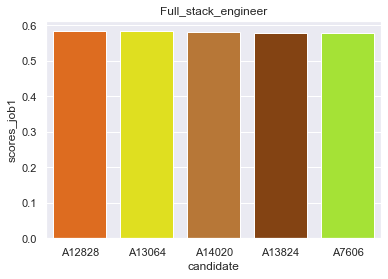

In [0]:
# Creating an array with the colours
colors = ["#FC6600", "#FFFF00", "#CC7722", "#964000", "#AEFF19"]
# Setting your custom color palette
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = df_job1.head(), x = "candidate", y = "scores_job1", palette=colors)
plt.title ("Full_stack_engineer")


Text(0.5, 1.0, 'Senior_Java_Engineer_Tech_Lead')

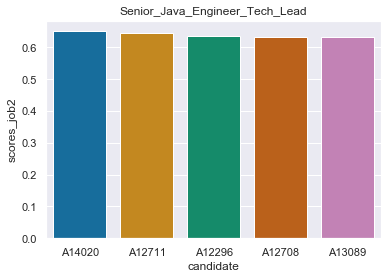

In [0]:
sns.barplot(data = df_job2.head(), x = "candidate", y = "scores_job2", palette="colorblind")
plt.title ("Senior_Java_Engineer_Tech_Lead")

Text(0.5, 1.0, 'Front_End_Developer')

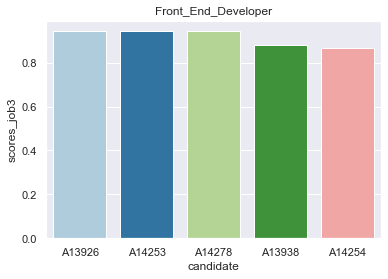

In [0]:
sns.barplot(data = df_job3.head(), x = "candidate", y = "scores_job3", palette = "Paired") 
plt.title ('Front_End_Developer') 

Text(0.5, 1.0, 'Application_Developer')

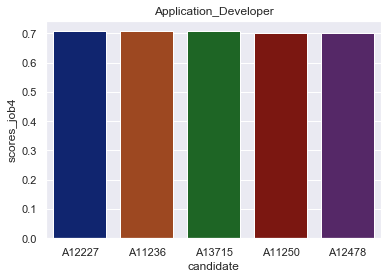

In [0]:
sns.barplot(data = df_job4.head(), x = "candidate", y = "scores_job4", palette = "dark")
plt.title ("Application_Developer")

In [0]:
w = df_jobs1234['scores_job1'].sort_values(ascending = False)
a = df_jobs1234['candidate'][w.iloc[0:5].index]
a = list(a)
x = df_jobs1234['scores_job2'].sort_values(ascending = False)
b = df_jobs1234['candidate'][x.iloc[0:5].index]
b = list(b)
y = df_jobs1234['scores_job3'].sort_values(ascending = False)
c = df_jobs1234['candidate'][y.iloc[0:5].index] 
c = list(c)
z = df_jobs1234['scores_job4'].sort_values(ascending = False)
d = df_jobs1234['candidate'][z.iloc[0:5].index]
d = list(d)

In [0]:
shortlist = pd.DataFrame(list(zip(a, b, c, d)), 
               columns =['Full_stack_engineer', 'Senior_Java_Engineer_Tech_Lead', 'Front_End_Developer','Application_Developer']) 
shortlist


,Full_stack_engineer,Senior_Java_Engineer_Tech_Lead,Front_End_Developer,Application_Developer
0,A12828,A14020,A13926,A11236
1,A13064,A12711,A14253,A12227
2,A14020,A12296,A14278,A13715
3,A13824,A11716,A13938,A12478
4,A7606,A8284,A14362,A11250


# USING TF  - IDF

In [0]:
#Importing TfidfVectorizer library

from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
#Initialize tfidf vectorizer

tfidf_vectorizer = TfidfVectorizer()

counts_tfidf= tfidf_vectorizer.fit_transform(df_final["text"]) #fitting and transforming the vector
counts_tfidf

<7010x1732 sparse matrix of type '<class 'numpy.float64'>'
	with 68471 stored elements in Compressed Sparse Row format>

In [0]:
cosine_sim = cosine_similarity(counts_tfidf, counts_tfidf)
print(cosine_sim)

[[1.         0.         0.         ... 0.00922223 0.02015056 0.01196651]
 [0.         1.         0.16634986 ... 0.         0.         0.        ]
 [0.         0.16634986 1.         ... 0.08362697 0.14581565 0.08659332]
 ...
 [0.00922223 0.         0.08362697 ... 1.         0.02660364 0.11366349]
 [0.02015056 0.         0.14581565 ... 0.02660364 1.         0.17072543]
 [0.01196651 0.         0.08659332 ... 0.11366349 0.17072543 1.        ]]


## job score 1 - tfidf

In [0]:
candidates = recommend("194")
idx = indices[indices == '194'].index[0]
cosine_sim[idx]
scores_job1 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
scores_job1 = list(scores_job1[1:])
df_job1 = pd.DataFrame(list(zip(candidates, scores_job1)), 
               columns =['candidate', 'scores_job1']) 
# Score for job 1
df_job1.head(20)

,candidate,scores_job1
0,A12828,0.305158
1,A13064,0.295649
2,A14020,0.291616
3,A13824,0.291247
4,A7606,0.289510
5,A13719,0.288407
6,A7511,0.283571
7,A13272,0.283571
8,A13067,0.279351
9,A13249,0.267904


## Job score 2

In [0]:
candidates = recommend("481")
idx = indices[indices == '481'].index[0]
cosine_sim[idx]
scores_job2 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
scores_job2 = list(scores_job2[1:])
df_job2 = pd.DataFrame(list(zip(candidates, scores_job2)), 
               columns =['candidate', 'scores_job2']) 
# Score for job 1
df_job2.head(20)

,candidate,scores_job2
0,A14020,0.380537
1,A12711,0.364598
2,A12296,0.364598
3,A12708,0.364598
4,A13089,0.363210
5,A11716,0.363210
6,A8284,0.348866
7,A13746,0.330270
8,A13896,0.330270
9,A11110,0.325618


In [0]:
candidates = recommend("839")
idx = indices[indices == '839'].index[0]
cosine_sim[idx]
scores_job3 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
scores_job3 = list(scores_job3[1:])
df_job3 = pd.DataFrame(list(zip(candidates, scores_job3)), 
               columns =['candidate', 'scores_job3']) 
# Score for job 1
df_job3.head(20)

,candidate,scores_job3
0,A13926,0.960607
1,A14253,0.960607
2,A14278,0.942209
3,A13938,0.932246
4,A14254,0.920593
5,A14362,0.916958
6,A14212,0.916958
7,A14043,0.873066
8,A8740,0.835969
9,A11218,0.819244


In [0]:
candidates = recommend("723")
idx = indices[indices == '723'].index[0]
cosine_sim[idx]
scores_job4 = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
scores_job4 = list(scores_job4[1:])
df_job4 = pd.DataFrame(list(zip(candidates, scores_job4)), 
               columns =['candidate', 'scores_job4']) 
# Score for job 1
df_job4.head(20)

,candidate,scores_job4
0,A12227,0.571337
1,A11236,0.424904
2,A13715,0.424052
3,A11250,0.422678
4,A12478,0.419878
5,A12537,0.404558
6,A11642,0.397861
7,A12162,0.397861
8,A13988,0.393348
9,A12480,0.379882


In [0]:
w = df_jobs1234['scores_job1'].sort_values(ascending = False)
a = df_jobs1234['candidate'][w.iloc[0:5].index]
a = list(a)
x = df_jobs1234['scores_job2'].sort_values(ascending = False)
b = df_jobs1234['candidate'][x.iloc[0:5].index]
b = list(b)
y = df_jobs1234['scores_job3'].sort_values(ascending = False)
c = df_jobs1234['candidate'][y.iloc[0:5].index] 
c = list(c)
z = df_jobs1234['scores_job4'].sort_values(ascending = False)
d = df_jobs1234['candidate'][z.iloc[0:5].index]
d = list(d)

In [0]:
shortlist = pd.DataFrame(list(zip(a, b, c, d)), 
               columns =['Full_stack_engineer', 'Senior_Java_Engineer_Tech_Lead', 'Front_End_Developer','Application_Developer']) 
shortlist


,Full_stack_engineer,Senior_Java_Engineer_Tech_Lead,Front_End_Developer,Application_Developer
0,A12828,A14020,A13926,A11236
1,A13064,A12711,A14253,A12227
2,A14020,A12296,A14278,A13715
3,A13824,A11716,A13938,A12478
4,A7606,A8284,A14362,A11250


using the tf - idf, we got different scores, but the recommendation for candidates to be shortlisted remained constant

# TRYING OUT K-MEANS

In [0]:
print(counts_tfidf.shape)
type(counts_tfidf) 

(7010, 1732)


scipy.sparse.csr.csr_matrix

In [0]:
print(counts_tfidf)

  (0, 788)	0.31190742226169016
  (0, 963)	0.2621648617092492
  (0, 1560)	0.3803089126074564
  (0, 215)	0.5886435287437545
  (0, 1418)	0.13979439084638828
  (0, 615)	0.2570656000461913
  (0, 158)	0.2854391707306356
  (0, 1081)	0.41922137070509485
  (1, 563)	0.21594703898888437
  (1, 962)	0.12608156236320722
  (1, 1252)	0.1427578378963585
  (1, 423)	0.17676315765737913
  (1, 219)	0.13334704339354686
  (1, 25)	0.22198827408675906
  (1, 983)	0.3517889718156061
  (1, 555)	0.21818243661517878
  (1, 23)	0.2193399985511551
  (1, 503)	0.25000327322330107
  (1, 501)	0.22478955113572072
  (1, 976)	0.5076105478267539
  (1, 1575)	0.21727587671015866
  (1, 1654)	0.17177022821659102
  (1, 511)	0.1715073574223905
  (1, 1656)	0.3499813479924013
  (2, 419)	0.30141774095032947
  :	:
  (7007, 518)	0.08250375144714676
  (7007, 1458)	0.12508836408945667
  (7007, 317)	0.08221923728094921
  (7007, 1418)	0.0659699499846767
  (7008, 510)	0.5458662687262688
  (7008, 644)	0.5498190926840052
  (7008, 1569)	0.20915

In [0]:
from sklearn.cluster import KMeans

C:\Users\Admin\Documents\ANITA-CONDA\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Admin\Documents\ANITA-CONDA\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [0]:
kmeans = KMeans(n_clusters=4).fit(counts_tfidf)

In [0]:
a = df["text"][df["Candidate Id"] == "A11236"] 
b = df["text"][df["Candidate Id"] == "A12828"]
c = df["text"][df["Candidate Id"] == "A14020"]
d = df["text"][df["Candidate Id"] == "A13926"]

In [0]:
w = list(df["text"])
w

['NCR Banking,Financial Services,Broking   Team Manager Insurance',
 'Vadodara Energy and Utilities | Telecommunications#Manufacturing | Electrical/Electronic Manufacturing#Ads, PR, Events | Marketing and Advertising Business Development#Manufacturing#Project Management Marketing Executive',
 'Noida IT | Computer Software#Manufacturing | Mechanical or Industrial Engineering IT Software Software Developer',
 'Hyderabad IT | Information Services, IT | Computer Software Business Development, IT Software Senior systems engineer',
 'Hyderabad IT | Computer Software IT Software#Research Software Developer',
 'Bengaluru/Bangalore IT | Information Technology and Services Product Management, support, Customer Service, BPO Senior Product Support Engineer',
 'Bengaluru IT | Computer Software#IT | Information Technology and Services#IT | Information Services IT Software#Financial Services, Banking, Investments, Insurance - specific#Project Management Java Developer',
 'Kolkata ITSoftware,Software 

In [0]:
a = list(a)
b = list(b)
c = list(c)
d = list(d)


In [0]:
# Making predictions
lines_for_predicting = [a,b,c,d]
lines_for_predicting

[['Bengaluru IT | Information Technology and Services   Developer,Java'],
 ['Coimbatore IT | Computer Software#IT | Information Services Engineering#IT Software Lead Full Stack Java Developer'],
 ['Hyderabad IT | Computer Software IT Software#Engineering Software Engineer in java With UI and Angularjs'],
 ['Bangalore IT | Information Technology and Services IT Software Front end developer']]

In [0]:
listOfList = [ [1, 2, 3, 4, 5],
                [11, 22, 33, 44, 55],
                [17, 18, 19, 20, 21] ]
 
flatList = []
for elem in lines_for_predicting:
    flatList.extend(elem)

In [0]:
flatList

['Bengaluru IT | Information Technology and Services   Developer,Java',
 'Coimbatore IT | Computer Software#IT | Information Services Engineering#IT Software Lead Full Stack Java Developer',
 'Hyderabad IT | Computer Software IT Software#Engineering Software Engineer in java With UI and Angularjs',
 'Bangalore IT | Information Technology and Services IT Software Front end developer']

In [0]:
predictions = kmeans.predict(tfidf_vectorizer.transform(w))

In [0]:
predictions[0:50]

array([0, 0, 3, 3, 3, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 0, 0,
       3, 1, 0, 3, 2, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3,
       0, 1, 0, 3, 0, 0])

In [0]:
df['text'].head(20)

0     NCR Banking,Financial Services,Broking   Team ...
1     Vadodara Energy and Utilities | Telecommunicat...
2     Noida IT | Computer Software#Manufacturing | M...
3     Hyderabad IT | Information Services, IT | Comp...
4     Hyderabad IT | Computer Software IT Software#R...
5     Bengaluru/Bangalore IT | Information Technolog...
6     Bengaluru IT | Computer Software#IT | Informat...
7     Kolkata ITSoftware,Software Services IT Softwa...
8     Mumbai Consumer | Consumer Goods#Medicine | Ho...
9     Mumbai Transport | Automotive, Education | Hig...
10    Jabalpur Manufacturing | Mechanical or Industr...
11    Jaipur Construction | Civil Engineering#Constr...
12    Hyderabad IT | Computer Software,IT | Internet...
13    Mumbai Construction | Facility Management#Educ...
14    Hyderabad Energy and Utilities | Environmental...
15    Hyderabad IT | Information Services, IT | Info...
16    Chennai ITSoftware,Software Services IT Softwa...
17    Bangalore IT | Computer Software#IT | Info

In [0]:
kmeans_2  = KMeans(n_clusters=4).fit(cosine_sim) 